N<div class="alert alert-info" role="alert">
<h4 class="alert-heading">Note séance 2: 5.5/10</h4>
</div>

<div class="alert alert-warning" role="alert">
Il faux commenter mieux les resultats obtenu.
</div>

Echantillonage 2D
========
TP1 séance 2-3
========
--------
nom1
safwane
nom2
ricardo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg

%matplotlib inline

img_cercles = cv2.imread('imageCercles.png',0)
img_sinus = cv2.imread('imageSinus.png',0)

 1) Programmez la decimation:
 
   Faire une fonction pour la decimation.
   
   Appliquer la fonction de decimation et montrer les images avant et apres decimation.

In [2]:
# La fonction déciamtion conserve un pixel sur i horizontalement et un pixel sur j verticalement
def decimation(img,i,j):
    (lignes,colonnes)= img.shape
    return img[1:lignes:i,1:colonnes:j]




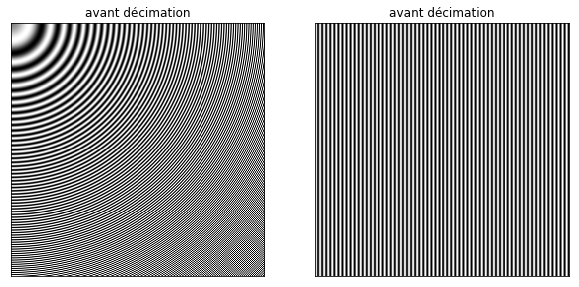

In [3]:
# On affiche l'image des cercles et du sinus avant décimation

plt.figure(2,figsize = (10,10))

plt.subplot(121)
plt.imshow(img_cercles, cmap = 'gray')
plt.title('avant décimation')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_sinus, cmap = 'gray')
plt.title('avant décimation')
plt.xticks([]), plt.yticks([])

plt.show()

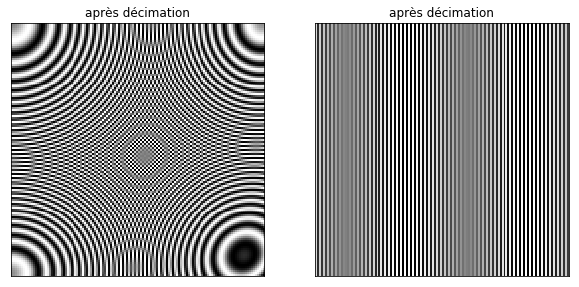

In [4]:
# On applique la fonction de décimation sur l'image des cercles et du sinus et on les affiche

plt.figure(2,figsize = (10,10))

img_cercles_sampled_4 = decimation(img_cercles,4,4)

plt.subplot(121)
plt.imshow(img_cercles_sampled_4, cmap = 'gray')
plt.title('après décimation')
plt.xticks([]), plt.yticks([])

img_sinus_sampled_4 = decimation(img_sinus,4,4)

plt.subplot(122)
plt.imshow(img_sinus_sampled_4, cmap = 'gray')
plt.title('après décimation')
plt.xticks([]), plt.yticks([])

plt.show()

# Explication : Nous avons perdu de l'information car nous avons supprimer des données pour que la mémoire de stockage 
# de l'image soit réduit
# Nous avons perdu en résolution
---> expliquer mieux le phenomene observe

2) Examinez le contenu de l’image du sinus avant et après décimation dans le domaine spectral. Indiquez
le phénomène en termes mathématiques.

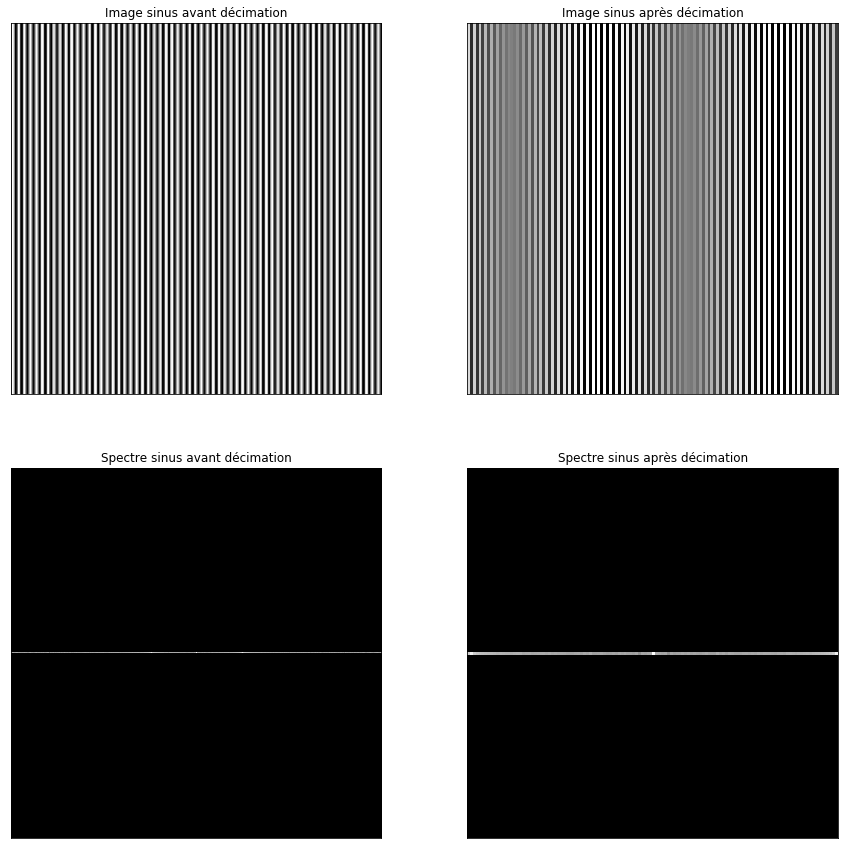

In [5]:
# On passe dans le domaine spectral

fsinus = np.fft.fft2(img_sinus)
fsinus_shift = np.fft.fftshift(fsinus)
spectre_sinus = 20*np.log(np.abs(fsinus_shift)+0.001)

fsinus_sampled = np.fft.fft2(img_sinus_sampled_4)
fsinus_sampled_shift = np.fft.fftshift(fsinus_sampled)
spectre_sinus2 = 20*np.log(np.abs(fsinus_sampled_shift)+0.001)


plt.figure(4,figsize = (15,15))
plt.subplot(221),plt.imshow(img_sinus, cmap = 'gray')
plt.title('Image sinus avant décimation'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(img_sinus_sampled_4, cmap = 'gray')
plt.title('Image sinus après décimation'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(spectre_sinus, cmap = 'gray')
plt.title('Spectre sinus avant décimation'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(spectre_sinus2, cmap = 'gray')
plt.title('Spectre sinus après décimation'), plt.xticks([]), plt.yticks([])
plt.show()

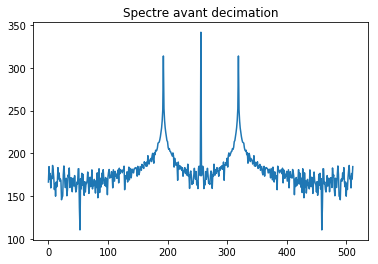

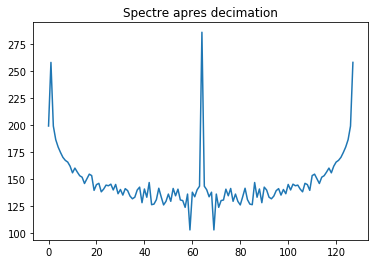

In [6]:

x1 = [i for i in range(512)]
y1 = [spectre_sinus[256,i]for i in range(512)]

x2 = [i for i in range(128)]
y2 = [spectre_sinus2[64,i]for i in range(128)]

plt.plot(x1,y1)
plt.title('Spectre avant decimation')
plt.show()
    
plt.plot(x2,y2)
plt.title('Spectre apres decimation')
plt.show()

# Explication : Après décimation on voit toujours 3 diracs mais pas à la même position.
# Ces 3 dirac sont plus écartés de la fréquence 0Hz.
# C'est pour cela que le spectre a été modifié. 
# En effet après la décimation la fréquence du signal a augmenté à cause des variations plus fortes du signal---->NON!!


3). Proposez un filtre naïf dans le domaine spectral pour éviter le phénomène observé.

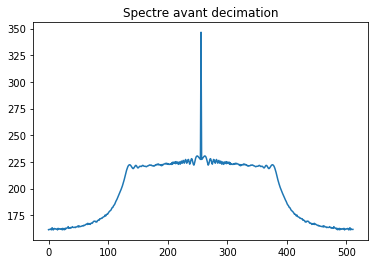

(512, 512)
512 512
262144
262144
262144


/home/benidir/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


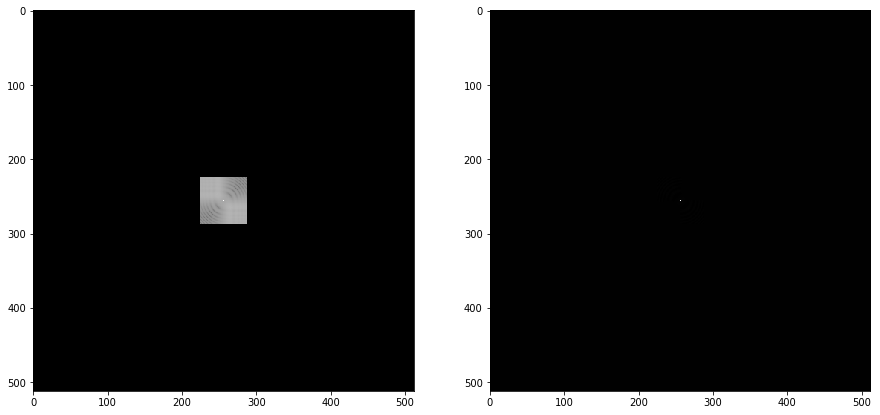

In [22]:
fcercles = np.fft.fft2(img_cercles)
fcercles_shift = np.fft.fftshift(fcercles)
spectre_cercles = 20*np.log(np.abs(fcercles_shift)+0.001)

x1 = [i for i in range(512)]
y1 = [spectre_cercles[256,i]for i in range(512)]


plt.plot(x1,y1)
plt.title('Spectre avant decimation')
plt.show()


ligne,colone = spectre_cercles.shape
print(spectre_cercles.shape)
print(ligne,colone)
filtre_carre64 = np.zeros((ligne,colone))
print(filtre_carre64.size)
print(fcercles_shift.size)


filtre_carre128 = np.zeros((ligne,colone))

filtre_carre64[224:512-224,224:512-224] = spectre_cercles[224:512-224,224:512-224]
filtre_carre64_bis = np.zeros((ligne,colone))
filtre_carre64_bis[224:512-224,224:512-224] = fcercles_shift[224:512-224,224:512-224]

print(filtre_carre64_bis.size)
plt.figure(1,figsize = (15,15))

plt.subplot(121)
plt.imshow(filtre_carre64,cmap = 'gray')

plt.subplot(122)
plt.imshow(filtre_carre64_bis,cmap = 'gray')
plt.show()

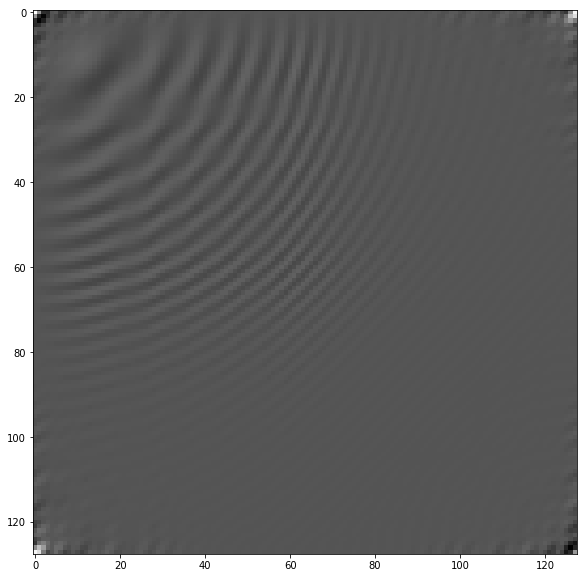

In [23]:
cercles_filtree64 = np.fft.ifft2(filtre_carre64_bis*fcercles_shift)
cercles_filtree64 = np.abs(cercles_filtree64)
img_cercles_sampled_4_64 = decimation(cercles_filtree64,4,4)

plt.figure(1,figsize = (10,10))

plt.imshow(img_cercles_sampled_4_64, cmap = 'gray')
plt.show()

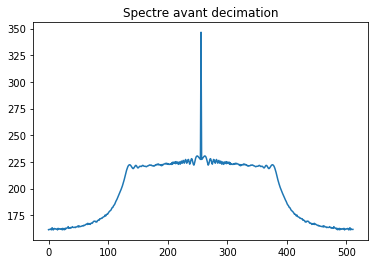

512 512


/home/benidir/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


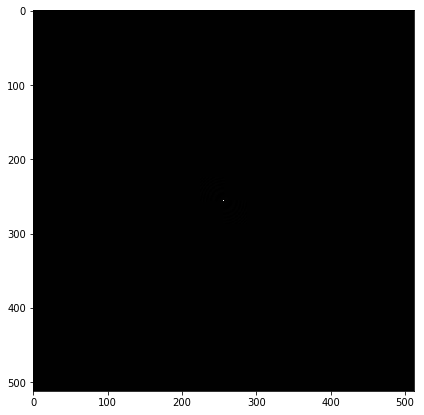

In [18]:
# effet de bord phénomène de gibbs
fcercles = np.fft.fft2(img_cercles)
fcercles_shift = np.fft.fftshift(fcercles)
spectre_cercles = 20*np.log(np.abs(fcercles_shift)+0.001)

x1 = [i for i in range(512)]
y1 = [spectre_cercles[256,i]for i in range(512)]


plt.plot(x1,y1)
plt.title('Spectre avant decimation')
plt.show()


#ligne,colone = fcercles_shift.shape
print(ligne,colone)
filtre_carre64 = np.zeros((ligne,colone))
filtre_carre128 = np.zeros((ligne,colone))

filtre_carre64[224:512-224,224:512-224] = fcercles_shift[224:512-224,224:512-224]

plt.figure(1,figsize = (15,15))

plt.subplot(121)
plt.imshow(filtre_carre64,cmap = 'gray')
plt.show()


In [27]:

cercles_filtree64 = np.fft.ifft2(filtre_carre64,spectre_cercles)
cercles_filtree64 = np.abs(cercles_filtree64)
img_cercles_sampled_4_64 = decimation(cercles_filtree64,4,4)

plt.figure(1,figsize = (10,10))

plt.imshow(img_cercles_sampled_4_64, cmap = 'gray')
plt.show()

ValueError: Shape and axes have different lengths.

4)Commentez la méthode proposée. Les résultats obtenus présentent-ils des dégradations visibles ? Proposer une explication pour le nouveau phénomène observé.


5)Proposez un ou plusieurs filtres qui permettent d’effectuer une décimation avec des défauts
presque négligeables.


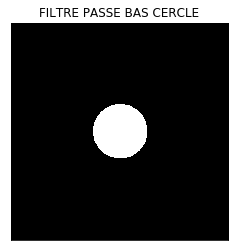

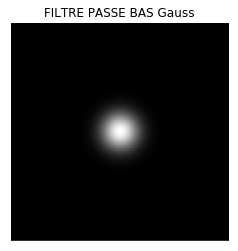

In [16]:
rayon = ligne/8
filtre_bas = np.zeros((ligne,colone),dtype=float)
for i in range(ligne):
    for j in range(colone):
        if((i-256)**2 + (j-256)**2 <= rayon**2):
            filtre_bas[i][j] = 1

## Affichage de notre filtre passe bas
plt.imshow(filtre_bas, cmap = 'gray')
plt.title('FILTRE PASSE BAS CERCLE'), plt.xticks([]), plt.yticks([])        
plt.show()
filtre_gauss=np.zeros((ligne,colone))   #On fait une matrice zero
sigma=30
for i in range (ligne):
    for j in range (colone):
        filtre_gauss[i][j]=np.exp(((-((i-ligne/2)**2+(j-colone/2)**2))/(2*((sigma)**2))))/(2*np.pi*sigma**2)

## Affichage de notre filtre passe bas
plt.imshow(filtre_gauss, cmap = 'gray')
plt.title('FILTRE PASSE BAS Gauss'), plt.xticks([]), plt.yticks([])        
plt.show()

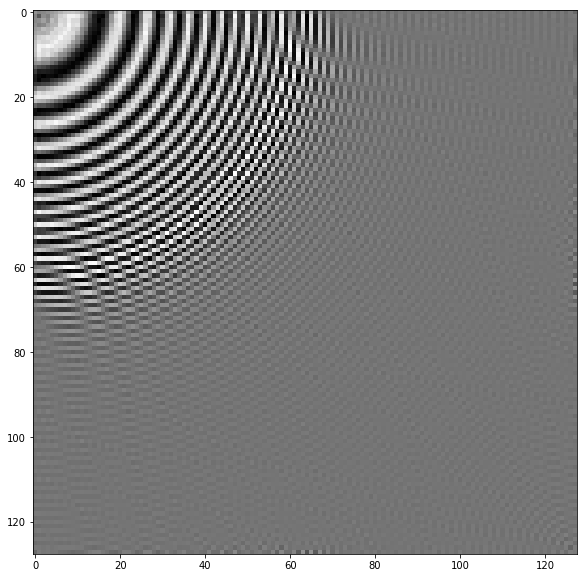

In [25]:
img_cercles_filtre_cercle64 = np.abs(np.fft.ifft2(filtre_bas*fcercles_shift))
img_cercles_filtre_cercle_sampled_4_64 = decimation(img_cercles_filtre_cercle64,4,4)

plt.figure(1,figsize = (10,10))

plt.imshow(img_cercles_filtre_cercle_sampled_4_64, cmap = 'gray')
plt.show()

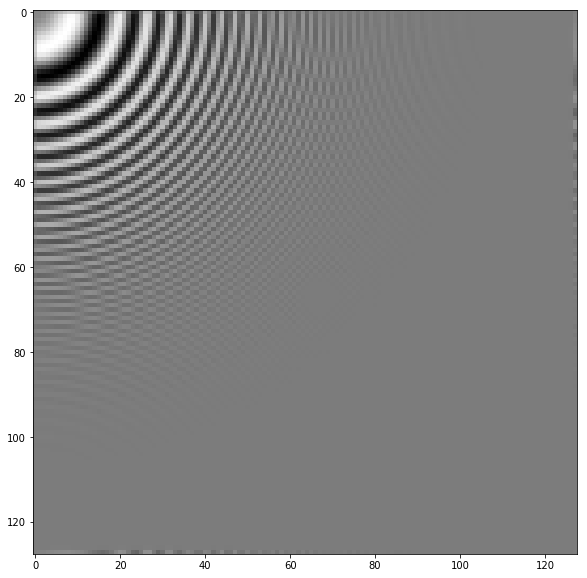

In [26]:
img_cercles_filtre_gauss64 = np.abs(np.fft.ifft2(filtre_gauss*fcercles_shift))
img_cercles_filtre_gauss_sampled_4_64 = decimation(img_cercles_filtre_gauss64,4,4)

plt.figure(1,figsize = (10,10))

plt.imshow(img_cercles_filtre_gauss_sampled_4_64, cmap = 'gray')
plt.show()